In [71]:
import numpy as np
import pandas as pd

import datetime
from pandas.tseries.frequencies import to_offset

import niftyutils
from niftyutils import load_nifty_data

import matplotlib.pyplot as plt

In [72]:
start_date = datetime.datetime(2005,8,1)
end_date = datetime.datetime(2020,9,25)
nifty_data = load_nifty_data(start_date,end_date)

## Daily Return Distribution (For 15 years)

In [73]:
daily_returns = (nifty_data['Close']/nifty_data['Close'].shift(1) - 1)*100
daily_returns = daily_returns.dropna()

In [74]:
daily_returns.describe()

count    3753.000000
mean        0.052015
std         1.441152
min       -12.980464
25%        -0.579597
50%         0.074331
75%         0.716017
max        17.744066
Name: Close, dtype: float64

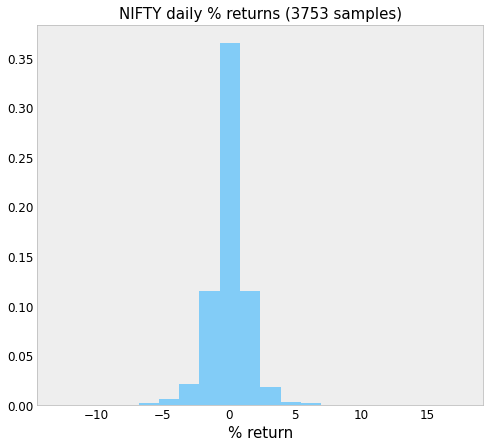

In [75]:
plt.figure(figsize=[8,7])
plt.style.use("bmh")

plt.hist(daily_returns, density = True, bins=20, color='#2ab0ff',alpha=0.55)

plt.xlabel('% return', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tick_params(left = False, bottom = False)
plt.title('NIFTY daily % returns ({} samples)'.format(len(daily_returns)),fontsize=15)
plt.grid(False)
plt.show()

In [76]:
custom_bins = [daily_returns.min(),-2.5,-2,-1.5,-1,0.-0.75,0.75,1.0,1.5,2.0,2.5,daily_returns.max()]
categorized_daily_returns = pd.cut(daily_returns, bins=custom_bins)
categorized_daily_returns.value_counts(normalize=True,sort=False)

(-12.98, -2.5]    0.035448
(-2.5, -2.0]      0.022921
(-2.0, -1.5]      0.033849
(-1.5, -1.0]      0.062367
(-1.0, -0.75]     0.053838
(-0.75, 0.75]     0.551706
(0.75, 1.0]       0.059968
(1.0, 1.5]        0.077292
(1.5, 2.0]        0.046908
(2.0, 2.5]        0.022388
(2.5, 17.744]     0.033316
Name: Close, dtype: float64

In [77]:
custom_bins_compact = [daily_returns.min(),-3,-1.5,-1.0,1.0,1.5,3.0,daily_returns.max()]
categorized_daily_returns = pd.cut(daily_returns, bins=custom_bins_compact)
categorized_daily_returns.value_counts(normalize=True,sort=False)

(-12.98, -3.0]    0.024787
(-3.0, -1.5]      0.067431
(-1.5, -1.0]      0.062367
(-1.0, 1.0]       0.665512
(1.0, 1.5]        0.077292
(1.5, 3.0]        0.081023
(3.0, 17.744]     0.021588
Name: Close, dtype: float64

## Weekly Return Distribution (For 15 years)

In [78]:
weekly_nifty_data = nifty_data.resample('W').agg(niftyutils.OHLC_CONVERSION_DICT)
weekly_nifty_data.index = weekly_nifty_data.index - to_offset('6D')

In [79]:
weekly_returns = (weekly_nifty_data['Close']/weekly_nifty_data['Close'].shift(1) - 1)*100
weekly_returns = weekly_returns.dropna().rename('returns')

In [80]:
weekly_returns.describe()

count    790.000000
mean       0.239652
std        2.964291
min      -15.949713
25%       -1.308922
50%        0.371412
75%        1.773317
max       15.438563
Name: returns, dtype: float64

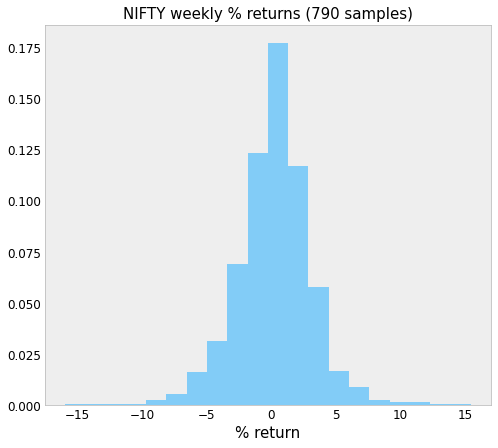

In [81]:
plt.figure(figsize=[8,7])
plt.style.use("bmh")

plt.hist(weekly_returns, density = True, bins=20, color='#2ab0ff',alpha=0.55)

plt.xlabel('% return', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tick_params(left = False, bottom = False)
plt.title('NIFTY weekly % returns ({} samples)'.format(len(weekly_returns)),fontsize=15)
plt.grid(False)
plt.show()

In [86]:
custom_bins_compact = [weekly_returns.min(),-5,-2.5,2.5,5,weekly_returns.max()]
categorized_weekly_returns = pd.cut(weekly_returns, bins=custom_bins_compact)
categorized_weekly_returns.value_counts(normalize=True,sort=False)

(-15.95, -5.0]    0.039290
(-5.0, -2.5]      0.098859
(-2.5, 2.5]       0.680608
(2.5, 5.0]        0.141952
(5.0, 15.439]     0.039290
Name: returns, dtype: float64

In [87]:
custom_bins_labels = ['-ve Extreme','-ve','normal','+ve','+ve Extreme']
return_categories = pd.cut(weekly_returns, bins=custom_bins_compact,labels=custom_bins_labels).rename('category')
weekly_returns_categorized = pd.concat([weekly_returns, return_categories], axis=1)